# Anscombe's  quartet

- toc: true 
- badges: true
- comments: false
- categories: [r,ggplot,recipes,simpson]


*TOC*
* can we create a function to recreate infinite Anscombe's quartet even with more points?


For a detailed description of Anscombe quartet see, F. J. "Graphs in Statistical Analysis." The American Statistician 27, no. 1 (1973): 17-21. Accessed July 4, 2021. doi:10.2307/2682899. Let's start importing the data and plot them also we will add the regression labs



x1,x2,x3,x4,y1,y2,y3,y4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56


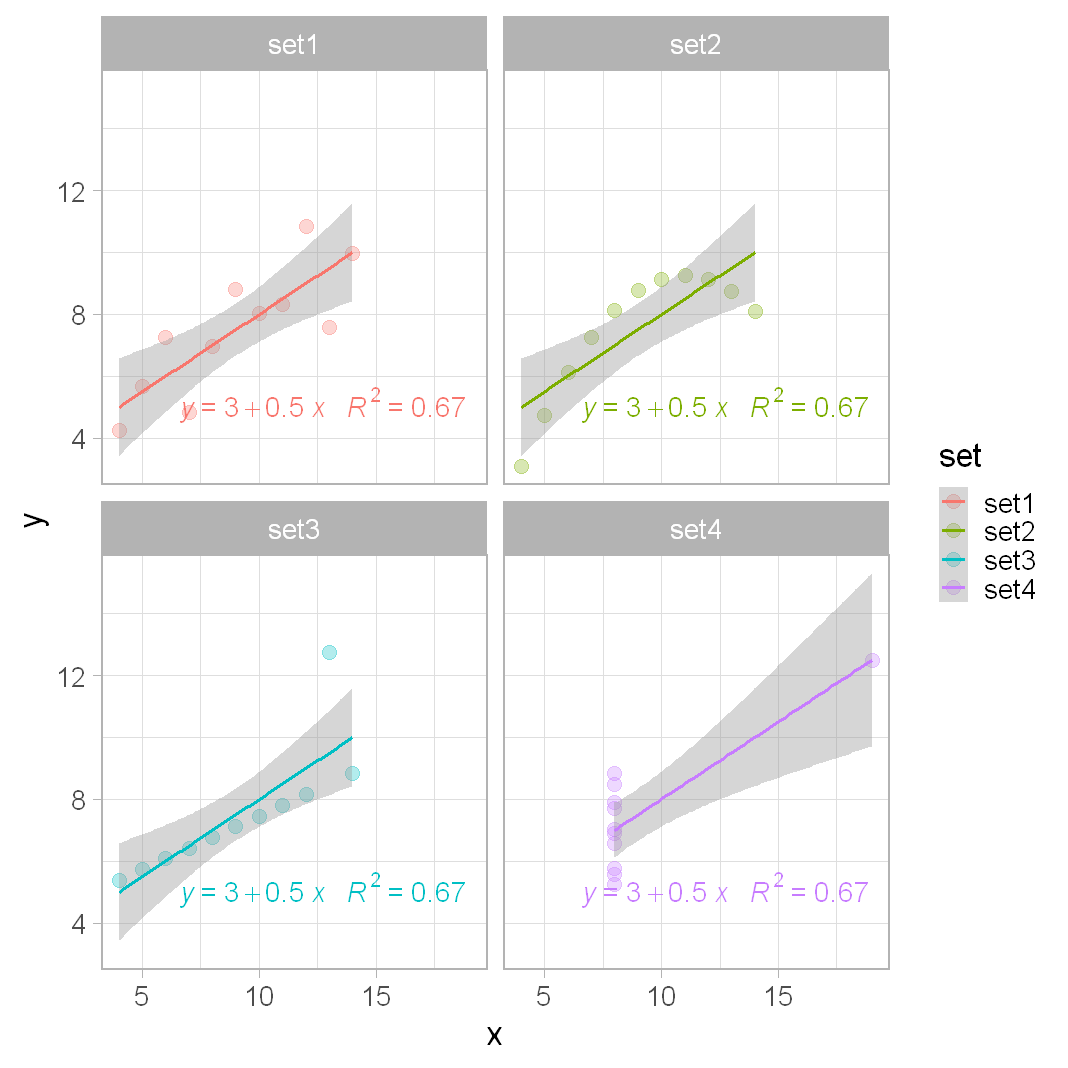

In [2]:
library(ggpmisc)
library(data.table)
library(ggplot2)
library(datasauRus)
options(repr.plot.width=8.9, repr.plot.height=8.9,units="cm")

anscombe

#rearrange to create a ggplot + regression
set1 <- data.frame(anscombe$x1, anscombe$y1)
set1$set <- "set1"
colnames(set1) <- c("x","y","set")
set2 <- data.frame(anscombe$x2, anscombe$y2)
set2$set <- "set2"
colnames(set2) <- c("x","y","set")
set3 <- data.frame(anscombe$x3, anscombe$y3)
set3$set <- "set3"
colnames(set3) <- c("x","y","set")
set4 <- data.frame(anscombe$x4, anscombe$y4)
set4$set <- "set4"
colnames(set4) <- c("x","y","set")

gganscombe <- rbind(set1,set2,set3,set4)
colnames(gganscombe) <- c("x","y","set")

#we need to define the formula before using them in ggsmooth see
#https://stackoverflow.com/a/39333833/6483091
formula <- y ~ x

p <- ggplot(gganscombe, aes(x= x, y= y, color = set)) +
  geom_point(alpha = 0.3,size = 4) +
  facet_wrap(~set, ncol=2)  +
  geom_smooth(method = "lm", formula = formula, se = T) +
  stat_poly_eq(aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
               label.x.npc = "right", label.y.npc = 0.15,
               formula = formula, parse = TRUE, size = 6)

p+theme_light(base_size=20)


x=gganscombe$x
y=gganscombe$y



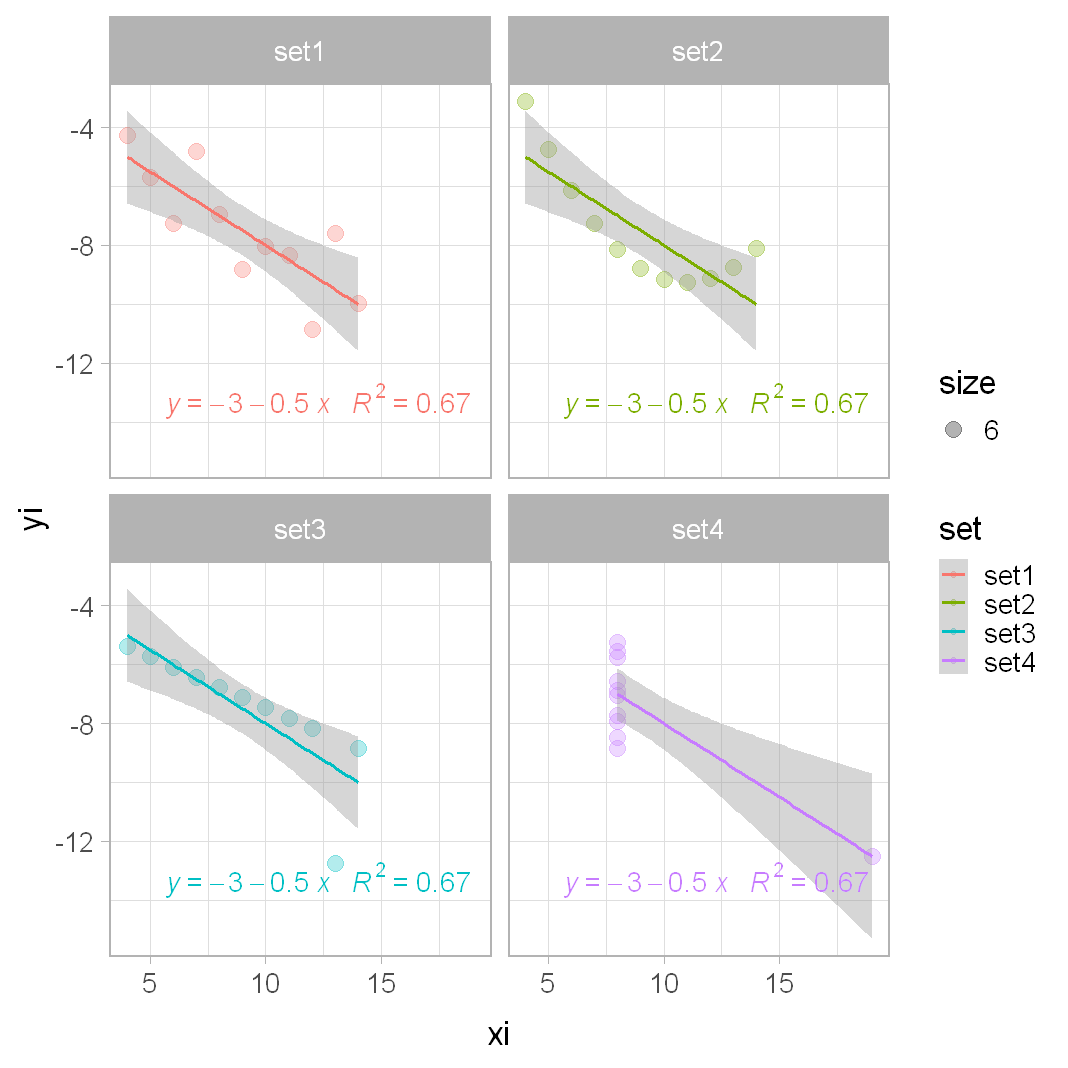

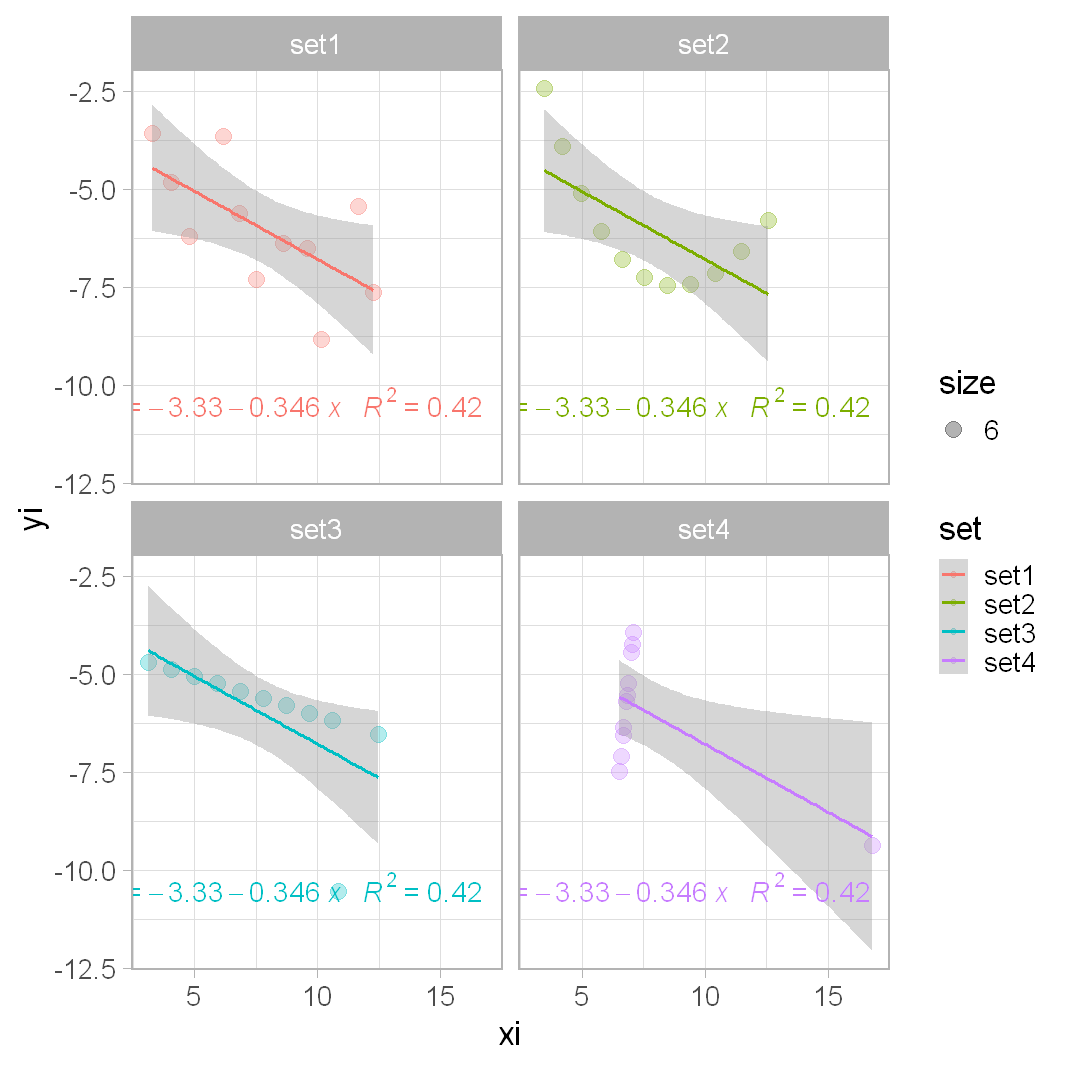

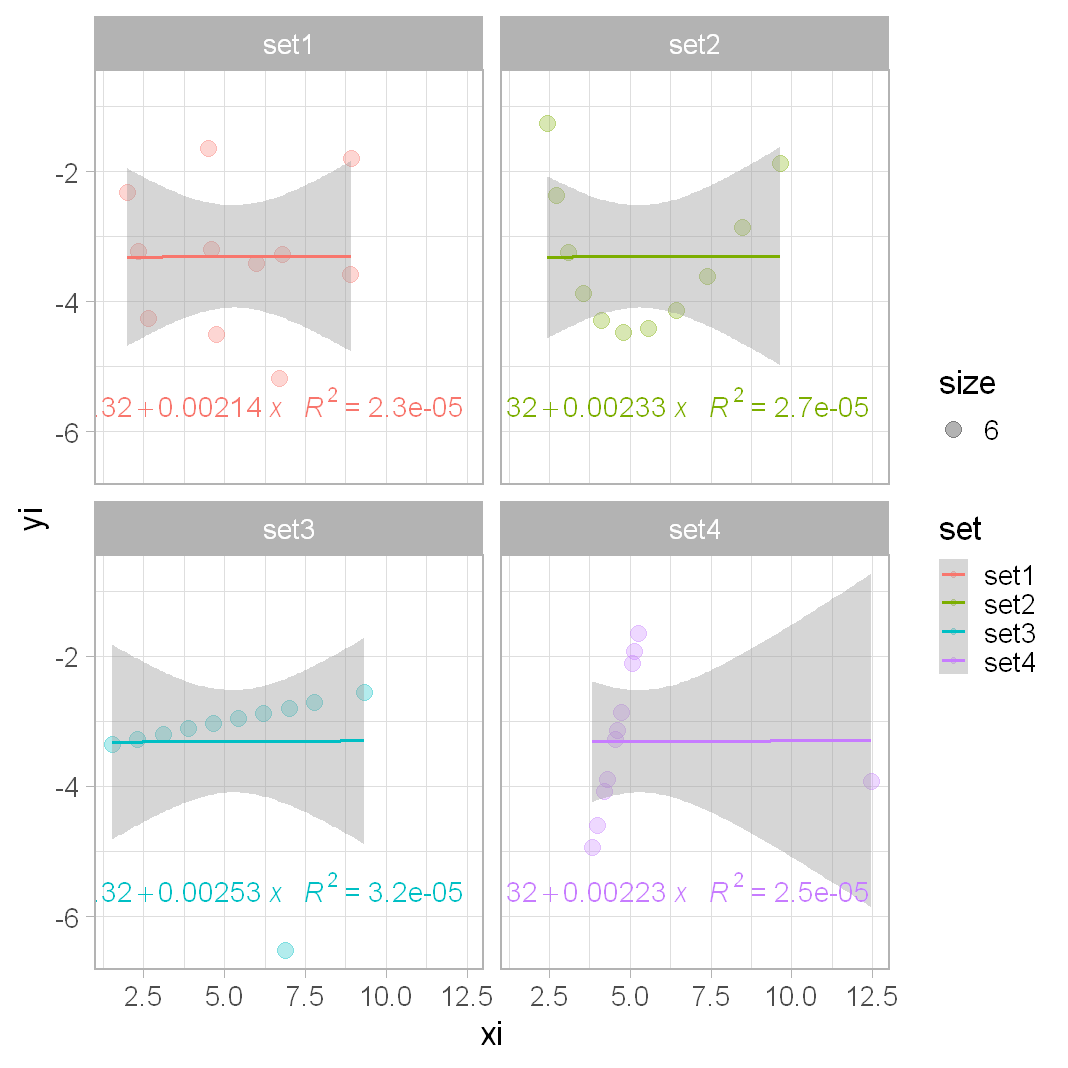

In [3]:

#which trick was used???
#let's try to rotate a bit the points..

#theta=-1/2
library(foreach)
theta <- seq(0,0.13,0.01)
a <-  foreach(i=1:length(theta)) %do%  {
gganscombe$xi <- (x*cos(pi*theta[i])-y*sin(pi*theta[i]))
gganscombe$yi <- (x*sin(pi*theta[i])-y*cos(pi*theta[i]))
#(look also at the error ! essentially perfect fit: summary may be unreliable)
p <- ggplot(gganscombe, aes(x= xi, y= yi, color = set)) +
  geom_point(aes(size = 6),alpha = 0.3) +
  facet_wrap(~set, ncol=2)  +
  geom_smooth(method = "lm", formula = formula, se = T) +
  stat_poly_eq(aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
               label.x.npc = "right", label.y.npc = 0.15,
               formula = formula, parse = TRUE, size = 6) + theme_light(base_size=20)

 }
 
a[[1]]
a[[6]]
a[[14]]

 

      xn1              yn1        
 Min.   : 4.280   Min.   : 5.100  
 1st Qu.: 6.075   1st Qu.: 5.805  
 Median : 7.990   Median : 7.605  
 Mean   : 8.607   Mean   : 7.396  
 3rd Qu.:11.307   3rd Qu.: 8.250  
 Max.   :13.660   Max.   :10.040  

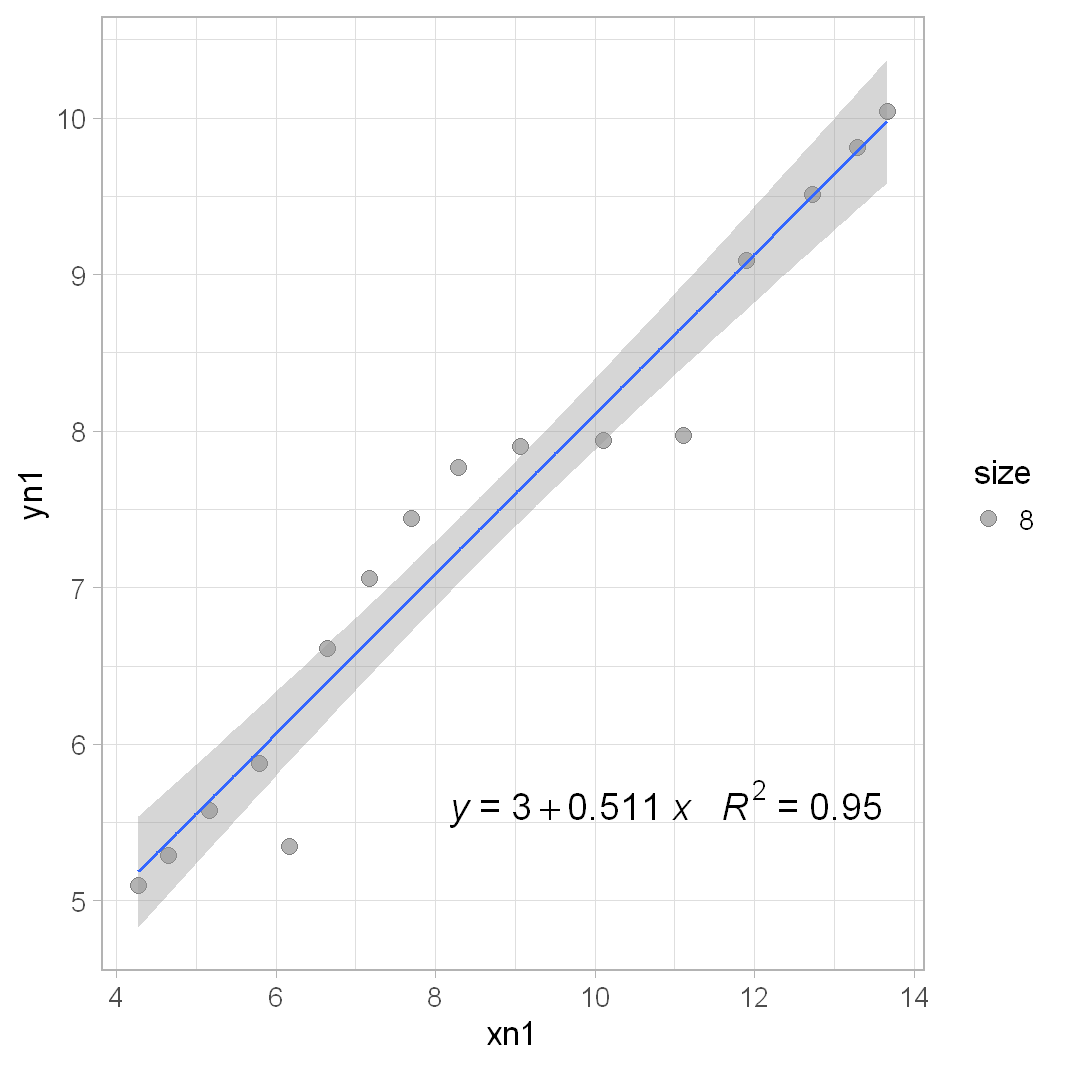

In [4]:

#an example of manually creating a simmetric dataset (look at the R with more points as expected and also compare the stats..
#the secret is all in the simmetry)

xn1 <- c(4.28,4.65,5.17, 5.79, 6.17, 6.65, 7.17, 7.70, 8.28, 9.06, 10.11,11.11, 11.90,12.73,13.29, 13.66)
yn1 <- c(5.10, 5.29, 5.58, 5.88, 5.35, 6.61, 7.06, 7.44, 7.77, 7.90, 7.94, 7.97, 9.09, 9.51, 9.81, 10.04)


datn1 <- data.frame(xn1,yn1)

pnew <- ggplot(datn1, aes(x = xn1, y= yn1)) +
  geom_point(aes(size = 8),alpha = 0.3) +
  geom_smooth(method = "lm", formula = formula, se = T) +
  stat_poly_eq(aes(label = paste(..eq.label.., ..rr.label.., sep = "~~~")), 
               label.x.npc = "right", label.y.npc = 0.15,
               formula = formula, parse = TRUE, size = 8)
pnew + theme_light(base_size=20)
summary(datn1)